# Problem #1

In [1]:
import re
import csv
import math
import numpy as np
import nltk
from nltk.corpus import gutenberg, stopwords

In [2]:
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alphard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/alphard/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/alphard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Preprocessing

In [3]:
# get stop words
Stop_words = stopwords.words('english') 

print(f'{len(Stop_words)} stop words')
print(Stop_words[:5])

179 stop words
['i', 'me', 'my', 'myself', 'we']


In [4]:
# get 'Alice In Wonderland' text
Sentences = gutenberg.sents('carroll-alice.txt')
print(f'{len(Sentences)} sentences')
print(Sentences[3])

1703 sentences
['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'"]


In [5]:
# filter sentences
TermsSentences = []
for terms in Sentences: 
    terms = [w for w in terms if w not in Stop_words] 
    terms = [w for w in terms if re.search(r'^[a-zA-Z]{2}', w) is not None]
    
    # remove punctuation
    terms = [w for w in terms if re.search(r'[.?!:\\-]', w) is None]
    
    # lower case words for consistency
    terms = [w.lower() for w in terms]
    
    # some sentences are blank i.e. TermsSentences[70]; remove blanks
    if len(terms) > 0:
        TermsSentences.append(terms)

In [6]:
# sanity check
print(f'{len(TermsSentences)} sentences')
print(TermsSentences[3])

1690 sentences
['alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversation']


In [7]:
# remove word 'said'; this is explained in the results
new = []
for i in TermsSentences:
    temp = []
    for j in i:
        if j != 'said':
            temp.append(j)
    new.append(temp)

TermsSentences = new

In [8]:
# denormalize the data
transaction_list = []
Item_names = {}
Item_ids = {}

item_id = 0

for sentence in TermsSentences:
    transaction = []
    for term in sentence:
        if term not in Item_ids:
            Item_ids[term] = item_id
            Item_names[item_id] = term
            item_id += 1
            
        transaction += [Item_ids[term]]
        
    transaction_list += [transaction]

M, N = len(Item_ids), len(transaction_list)
Items = np.arange(0,M)

# Information
print(f'M={M} items, N={N} transactions')

M=2511 items, N=1690 transactions


In [9]:
# check a transaction
print(transaction_list[4])

[26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 7, 50, 51, 52, 53]


In [10]:
# convert transactions to numpy arrays
Transactions = np.full((N,M), False, dtype=bool)

for i, t in enumerate(transaction_list):
    for term in t:
        Transactions[i][term] = True

In [11]:
# sanity check
print(f'{Transactions[4].astype(int)}')

[0 0 0 ... 0 0 0]


In [12]:
# create Weka csv
with open('AliceInWonderland.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',', quoting=csv.QUOTE_ALL, quotechar="'", lineterminator='\n')
    writer.writerow([Item_names[i] for i in range(M)])
    for i in range(N):
        writer.writerow(list(map(lambda x: '' if x == False else 'True', Transactions[i])))

In [13]:
# calculate MINIMUM SUPPORT threshold
minSupp = 1 / N
print(f'Minimum Support Threshold: {minSupp}')

Minimum Support Threshold: 0.000591715976331361


Therefore, to capture any terms with a single support value, the minimum support threshold is set to 0.0005

In [14]:
# RESULTS

**minSupp = 0.001**

**'said'** was not classified as a stop word and is still included in the sentences. The results below show that 'said' is highly associated with other words. Given that this text is from a novel, it makes sense that 'said' has high association. Therefore, I edited the code to remove 'said'.

FPGrowth found 522170 rules (displaying top 10)

 1. [interesting=True]: 5 ==> [said=True]: 5   <conf:(1)> lift:(3.74) lev:(0) conv:(3.66) 
 2. [case=True]: 5 ==> [said=True]: 5   <conf:(1)> lift:(3.74) lev:(0) conv:(3.66) 
 3. [sigh=True]: 4 ==> [said=True]: 4   <conf:(1)> lift:(3.74) lev:(0) conv:(2.93) 
 4. [indignantly=True]: 4 ==> [said=True]: 4   <conf:(1)> lift:(3.74) lev:(0) conv:(2.93) 
 5. [consider=True]: 4 ==> [said=True]: 4   <conf:(1)> lift:(3.74) lev:(0) conv:(2.93) 
 6. [sulky=True]: 3 ==> [said=True]: 3   <conf:(1)> lift:(3.74) lev:(0) conv:(2.2) 
 7. [pray=True]: 3 ==> [said=True]: 3   <conf:(1)> lift:(3.74) lev:(0) conv:(2.2) 
 8. [list=True]: 3 ==> [said=True]: 3   <conf:(1)> lift:(3.74) lev:(0) conv:(2.2) 
 9. [care=True]: 3 ==> [said=True]: 3   <conf:(1)> lift:(3.74) lev:(0) conv:(2.2) 
10. [allow=True]: 3 ==> [said=True]: 3   <conf:(1)> lift:(3.74) lev:(0) conv:(2.2) 

**minSupp = 0.001**

**'said'** is removed in this dataset

Furthermore, using the calculated minSupp value of 1/N = 0.0005 is too low and yields insignificant results such as 'alice', the name of the main character. However, we could use this result to see what words are associated with 'alice' to perhaps gain a better understanding of her charactrization.

FPGrowth found 517569 rules (displaying top 10)

 1. [curiosity=True]: 5 ==> [alice=True]: 5   <conf:(1)> lift:(4.34) lev:(0) conv:(3.85) 
 2. [ventured=True]: 4 ==> [alice=True]: 4   <conf:(1)> lift:(4.34) lev:(0) conv:(3.08) 
 3. [thank=True]: 4 ==> [alice=True]: 4   <conf:(1)> lift:(4.34) lev:(0) conv:(3.08) 
 4. [natural=True]: 4 ==> [alice=True]: 4   <conf:(1)> lift:(4.34) lev:(0) conv:(3.08) 
 5. [pleaded=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 
 6. [only=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 
 7. [knowledge=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 
 8. [hungry=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 
 9. [forgetting=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 
10. [expecting=True]: 3 ==> [alice=True]: 3   <conf:(1)> lift:(4.34) lev:(0) conv:(2.31) 

In [15]:
from IPython.display import display, Image
i = Image(url= "/home/alphard/Pictures/61084fd1af3b2.jpg", width=400, height=400)
display(i)

**minSupp = 0.0003**

After testing many values of minSupp, it appears that with *minSupp = 1/M = 0.00039 --> 0.0003* was able to yield the desired rules. We observe 'white rabbit' and 'mock turtle' in **rules 2 & 17**.

We see that the world little is associated with the items table, key, thing. This makes sense as the adjective little can be used to describe the size of these objects. I am not too familiar with *Alice In Wonderland*, but I suppose that a table / key changes in size? Alice also appears quite a few times in the top rules. As mentioned before, it is the main characters name, so perhaps it is best to treat 'alice' as a stop word.

FPGrowth found 30 rules (displaying top 20)

 1. [golden=True]: 7 ==> [little=True]: 7   <conf:(1)> lift:(14.57) lev:(0) conv:(6.52) 
 2. **[mock=True]: 56 ==> [turtle=True]: 56   <conf:(1)> lift:(29.14) lev:(0.03) conv:(54.08)** 
 3. [hare=True]: 30 ==> [march=True]: 30   <conf:(1)> lift:(54.52) lev:(0.02) conv:(29.45) 
 4. [gardeners=True]: 7 ==> [three=True]: 7   <conf:(1)> lift:(62.59) lev:(0) conv:(6.89) 
 5. [join=True]: 9 ==> [dance=True]: 9   <conf:(1)> lift:(130) lev:(0.01) conv:(8.93) 
 6. [pardon=True]: 6 ==> [beg=True]: 6   <conf:(1)> lift:(211.25) lev:(0) conv:(5.97) 
 7. [soo=True]: 7 ==> [oop=True]: 7   <conf:(1)> lift:(241.43) lev:(0) conv:(6.97) 
 8. [oop=True]: 7 ==> [soo=True]: 7   <conf:(1)> lift:(241.43) lev:(0) conv:(6.97) 
 9. [thought=True, get=True]: 6 ==> [alice=True]: 6   <conf:(1)> lift:(4.34) lev:(0) conv:(4.62) 
10. [thought=True, might=True]: 6 ==> [alice=True]: 6   <conf:(1)> lift:(4.34) lev:(0) conv:(4.62) 
11. [alice=True, turtle=True]: 6 ==> [mock=True]: 6   <conf:(1)> lift:(30.18) lev:(0) conv:(5.8) 
12. [alice=True, mock=True]: 6 ==> [turtle=True]: 6   <conf:(1)> lift:(29.14) lev:(0) conv:(5.79) 
13. [thing=True, poor=True]: 6 ==> [little=True]: 6   <conf:(1)> lift:(14.57) lev:(0) conv:(5.59) 
14. [table=True, glass=True]: 7 ==> [little=True]: 7   <conf:(1)> lift:(14.57) lev:(0) conv:(6.52) 
15. [key=True, golden=True]: 6 ==> [little=True]: 6   <conf:(1)> lift:(14.57) lev:(0) conv:(5.59) 
16. [the=True, mock=True]: 6 ==> [turtle=True]: 6   <conf:(1)> lift:(29.14) lev:(0) conv:(5.79) 
17. **[the=True, white=True]: 6 ==> [rabbit=True]: 6   <conf:(1)> lift:(35.96) lev:(0) conv:(5.83)** 
18. [went=True, turtle=True]: 6 ==> [mock=True]: 6   <conf:(1)> lift:(30.18) lev:(0) conv:(5.8) 
19. [went=True, mock=True]: 6 ==> [turtle=True]: 6   <conf:(1)> lift:(29.14) lev:(0) conv:(5.79) 
20. [would=True, turtle=True]: 6 ==> [mock=True]: 6   <conf:(1)> lift:(30.18) lev:(0) conv:(5.8)

**NOTE**: For some reason the image of my Weka settings cannot be displayed. I will attach the image along with the notebook upon submission.

# Problem #2

In [16]:
import matplotlib.pyplot as plt

In [17]:
# load data
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train, y_train = load_mnist('.', kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist('.', kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


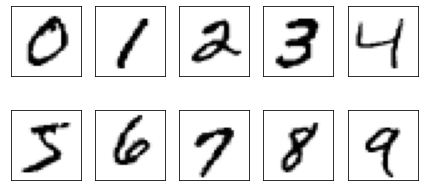

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [19]:
from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float
    
class NeuralNetMLP_2HL(object):
    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + exp(-clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h1 = dot(X, self.w_h1)
        a_h1 = self.sigmoid(z_h1)
        
        z_h2 = dot(a_h1, self.w_h2)
        a_h2 = self.sigmoid(z_h2)
        
        z_out = dot(a_h2, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (log(output))
        term2 = (1.0-y_enc) * log(1.0-output)
        cost = sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X)
        y_pred = argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, self.n_hidden))
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        
        for i in range(self.epochs):
            indices = arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train[batch_idx])
                
                sigmoid_derivative_h1 = a_h1 * (1.0-a_h1)  # Eq 3
                sigmoid_derivative_h2 = a_h2 * (1.0-a_h2)
                
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                
                delta_h2 = (dot(delta_out, self.w_out.T) * sigmoid_derivative_h2)  # Eq 6
                delta_h1 = (dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h1)
                
                grad_w_out = dot(a_h2.T, delta_out)  # Eq 7
                grad_w_h2 = dot(a_h1.T, delta_h2)  # Eq 8
                grad_w_h1 = dot(X_train[batch_idx].T, delta_h1)
                
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h2 -= self.eta*grad_w_h2  # Eq 9
                self.w_h1 -= self.eta*grad_w_h1
                
            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
        
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()

        return self

/tmp/ipykernel_234366/3900453948.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, zeros, exp, clip, dot, log, sum, argmax, unique, arange, float


In [20]:
# Define and fit the neural network
nn = NeuralNetMLP_2HL(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

300/300 | Cost: 7923.15 | Train/Valid Acc.: 98.07%/95.78%  

From the module notebook, 1 hidden layer (20 neurons) resulted in the following:

>300/300 | Cost: 15436.03 | **Train/Valid Acc.: 96.21%/95.50%** 

Using the same number of neurons for a hidden layer, but just adding an extra layer, we get:

>300/300 | Cost: 7923.15 | **Train/Valid Acc.: 98.07%/95.78%**  

Here, we see that with an additional layer, cost has been reduced by about 50%. Both the training and validation accuracy increased slightly, with the increase in training accuracy higher than that for validation. This suggests that with an extra hidden layer, the model is able to better memorize the training dataset. However, we see that this only resulted in a 0.28% increase of validation accuracy.